
# Project: Investigate a Dataset - [Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016, The database is stored in a SQLite database, by exploring the database, we noticed that it contains more than one table like Player_Attributes, Player, League, and Match, we selected the tables that will contribute to answering the research questions, merged between the tables Player & Player_Attributes, League & Match and used groupby method to create new dataframes and merged them with the original tables.


### Question(s) for Analysis
> By exploring the dataset, we planned to answer the following questions: the first question is about the ten most players in the mean of finishing attacks, with the ten most factors positively related to finishing, the second question is about the most league stages, and the most leagues in which goals scored using visualiztion.                                 

In [49]:
# Importing all of the packages that will be used.
import opendatasets as od
from IPython.display import display
import sqlite3
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['font.size'] = 14

In [50]:
# downloading the dataset from kaggle.
dataset_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4cad_database/database.sqlite'

In [5]:
od.download(dataset_url)

100%|███████████████████████████████████████████████████████████████| 313090048/313090048 [04:14<00:00, 1229688.21it/s]


In [9]:
# Upgrading pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  error: subprocess-exited-with-error
  
  Running setup.py install for pandas did not run successfully.
  exit code: 1
  
  [909 lines of output]
  running install
  C:\Program Files\Python310\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
    warnings.warn(
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.10
  creating build\lib.win-amd64-3.10\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-3.10\pandas
  copying pandas\testing.py -> build\lib.win-amd64-3.10\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-3.10\pandas
  copying pandas\_version.py -> build\lib.win-amd64-3.10\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-3.10\pandas
  creating build\lib.win-amd64-3.10\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-3.10\pandas\api
  creating build\lib.win-amd64-3.10\pandas\arrays
  co


  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for pandas, since package 'wheel' is not installed.
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
  Running setup.py install for pandas: started
  Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\program files\python310\lib\site-packages\pandas-1.4.2.dist-info\
   from C:\Program Files\Python310\Lib\site-packages\~andas-1.4.2.dist-info
  Moving to c:\program files\python310\lib\site-packages\pandas\
   from C:\Program Files\Python310\Lib\site-packages\~andas


<a id='wrangling'></a>
## Data Wrangling


### * Loading data and exploring the names of dataset tables:

In [51]:
conn = sqlite3.connect("database.sqlite")
c = conn.cursor()
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


### * In this part we'll begin to gather data from the tables: 'Player_Attributes', 'Player', 'League', 'Match', merging the tables ('Player_Attributes' & 'Player'), ('League' & 'Match').

In [52]:
def max_columns(data,number):
    with pd.option_context('display.max_columns', number):
        display(data.head())

In [53]:
# Showing Player_Attributes table.
player_attributes = pd.read_sql('SELECT * FROM Player_Attributes',conn)
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [54]:
max_columns(player_attributes,42)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [55]:
# Showing Player table.
player = pd.read_sql('SELECT * FROM Player',conn)
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [56]:
# Getting the final form of the two tebles Player , Player_Attributes by merging on 'player_api_id', dropping, and renaming.
player_final=player.merge(player_attributes,on='player_api_id')
max_columns(player_final,48)

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [57]:
player_final.drop(['id_x','id_y','player_fifa_api_id_y'], axis=1, inplace=True)

In [58]:
player_final.rename(columns={'player_fifa_api_id_x':'player_fifa_api_id'},inplace=True)

In [59]:
max_columns(player_final,45)

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [60]:
# Showing Match table.
match = pd.read_sql('SELECT * FROM Match',conn)
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [61]:
max_columns(match,115)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [62]:
# Showing League table.
league = pd.read_sql('SELECT * FROM League',conn)
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [63]:
# Merging Match , League tables by the column 'country_id'
match_merged=match.merge(league,on='country_id')
match_merged.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id_y,name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,1,Belgium Jupiler League


### * In this part we'll begin to get the total number of goals for every league and merging with the dataframe 'match_merged' by the column 'name'.

In [64]:
# Getting the total number of goals for every league with dropping and renaming.
total_league_goals= match_merged.groupby('name')[['home_team_goal','away_team_goal']].sum()
total_league_goals

,home_team_goal,away_team_goal
name,,
Belgium Jupiler League,2781,2060
England Premier League,4715,3525
France Ligue 1,4265,3162
Germany 1. Bundesliga,3982,3121
Italy Serie A,4528,3367
Netherlands Eredivisie,4357,3185
Poland Ekstraklasa,2678,1978
Portugal Liga ZON Sagres,2890,2311
Scotland Premier League,2607,2197


In [65]:
total_league_goals['league_total_goals']=total_league_goals['home_team_goal']+total_league_goals['away_team_goal']
total_league_goals

,home_team_goal,away_team_goal,league_total_goals
name,,,
Belgium Jupiler League,2781,2060,4841
England Premier League,4715,3525,8240
France Ligue 1,4265,3162,7427
Germany 1. Bundesliga,3982,3121,7103
Italy Serie A,4528,3367,7895
Netherlands Eredivisie,4357,3185,7542
Poland Ekstraklasa,2678,1978,4656
Portugal Liga ZON Sagres,2890,2311,5201
Scotland Premier League,2607,2197,4804


In [66]:
# Getting the final form of Match table by merging with the dataframe: total_league_goals. 
match_final=match_merged.merge(total_league_goals, on='name')
match_final.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal_x,...,GBD,GBA,BSH,BSD,BSA,id_y,name,home_team_goal_y,away_team_goal_y,league_total_goals
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.25,4.00,1.73,3.40,4.20,1,Belgium Jupiler League,2781,2060,4841
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.75,1.91,3.25,3.60,1,Belgium Jupiler League,2781,2060,4841
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.20,2.50,2.30,3.20,2.75,1,Belgium Jupiler League,2781,2060,4841
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,5.50,1.44,3.75,6.50,1,Belgium Jupiler League,2781,2060,4841
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.50,1.65,4.75,3.30,1.67,1,Belgium Jupiler League,2781,2060,4841


In [67]:
match_final.drop(['id_y','home_team_goal_y','away_team_goal_y'], axis=1, inplace=True)

In [68]:
match_final.rename(columns={'id_x':'id','home_team_goal_x':'home_team_goal','away_team_goal_x':'away_team_goal','name':'league_name'},inplace=True)

In [69]:
max_columns(match_final,117)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league_name,league_total_goals
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,Belgium Jupiler League,4841
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,Belgium Jupiler League,4841
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,Belgium Jupiler League,4841
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,Belgium Jupiler League,4841
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,Belgium Jupiler League,4841


### * Checking characteristics of the dataframes (player_final, match_final), null values, and duplicates:

In [98]:
player_final.shape

(183977, 45)

In [70]:
player_final.isnull().sum()

player_api_id             0
player_name               0
player_fifa_api_id        0
birthday                  0
height                    0
weight                    0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision              

In [71]:
player_final.duplicated().sum()

1

In [72]:
match_final.shape

(25979, 117)

In [73]:
match_final.isnull().sum()

id                        0
country_id                0
league_id                 0
season                    0
stage                     0
                      ...  
BSH                   11818
BSD                   11818
BSA                   11818
league_name               0
league_total_goals        0
Length: 117, dtype: int64

In [74]:
match_final.duplicated().sum()

0

### Data Cleaning

### * In this part we'll begin to get replace null values with zero using numpy, and remove duplicates.

In [75]:
player_final=player_final.replace(np.nan,0)

In [76]:
match_final=match_final.replace(np.nan,0)

In [77]:
player_final.drop_duplicates(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: List in order the ten most players for the mean of finishing attacks, with the ten most factors positively related to finishing.

In [78]:
# Getting the ten most players for the mean of finishing attacks.
most_finishing_mean=player_final.groupby('player_name')[['finishing']].mean().sort_values('finishing', ascending=False).head(10)
most_finishing_mean

,finishing
player_name,
Lionel Messi,92.230769
Cristiano Ronaldo,91.120000
Filippo Inzaghi,91.111111
Ruud van Nistelrooy,90.800000
Zlatan Ibrahimovic,90.000000
David Villa,88.833333
Robin van Persie,88.710526
Sergio Aguero,88.685714
Klaas Jan Huntelaar,88.071429


### * It is clear from the above that the ten most players for the mean of finishing attacks was orderely Listed using 'groupby' method started with Lionel Messi (first place) and ended with Wyne Rooney (tenth place), now we'll try to get the ten most factors positively related to finishing:

In [79]:
# Getting the ten most factors positively related to finishing.
most_finishing_correlated=player_final.corr()[['finishing']].sort_values('finishing', ascending=False).head(11)[1:]
most_finishing_correlated

,finishing
volleys,0.825045
long_shots,0.812348
positioning,0.805167
dribbling,0.792035
shot_power,0.736656
penalties,0.730406
ball_control,0.729369
curve,0.673438
free_kick_accuracy,0.643951
vision,0.622845


### * It is clear from the above that the ten most factors positively related to finishing was found using correlation coefficients started with volleys (first place) and ended with vision (tenth place).

### Research Question 2: Using visualization, try to show the most league stages, and the most leagues in which goals scored.

In [80]:
# Getting the total number of goals for every Stage.
total_stage_goals= match_final.groupby('stage')[['home_team_goal','away_team_goal']].sum()
total_stage_goals

,home_team_goal,away_team_goal
stage,,
1,1061,852
2,1139,876
3,1083,848
4,1179,846
5,1067,839
6,1130,854
7,1168,857
8,1255,916
9,1071,834


In [81]:
total_stage_goals['stage_total_goals']=total_stage_goals['home_team_goal']+total_stage_goals['away_team_goal']
total_stage_goals

,home_team_goal,away_team_goal,stage_total_goals
stage,,,
1,1061,852,1913
2,1139,876,2015
3,1083,848,1931
4,1179,846,2025
5,1067,839,1906
6,1130,854,1984
7,1168,857,2025
8,1255,916,2171
9,1071,834,1905


In [82]:
def plotting(table,column,xlabel,ylabel,title):
    sns.set_style("darkgrid")
    plt.figure(figsize=(20, 8))
    plt.plot(table[column],'o--r')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

In [83]:
def barplotting(table,xlabel,ylabel,title):
    plt.figure(figsize=(28, 10))
    sns.barplot(x=xlabel,y=ylabel,data=table)
    plt.title(title);

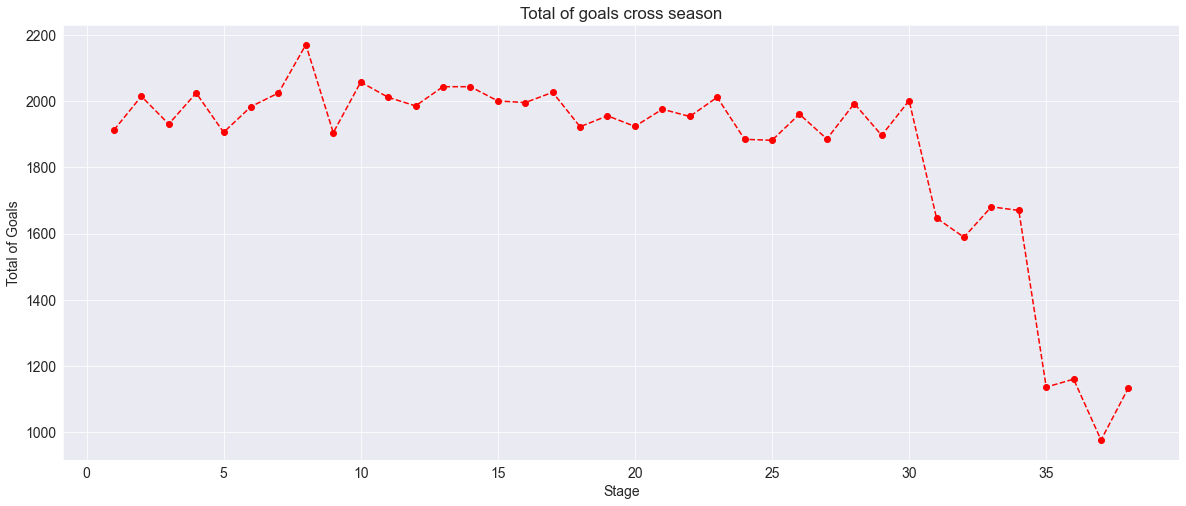

In [84]:
# Visualtion for the total of goals for stages 
plotting(total_stage_goals,'stage_total_goals','Stage','Total of Goals','Total of goals cross season')

### * It is clear from the above that visualization was used to show the most league stages in which goals scored, the most goals was scored at the eighth stage, and the total goals began to decrease from the thirty stage, now we'll use visualization for showing the most leagues in which goals scored:

In [85]:
# replace space with line break
match_final['league_name']=match_final['league_name'].str.replace(' ', '\n')

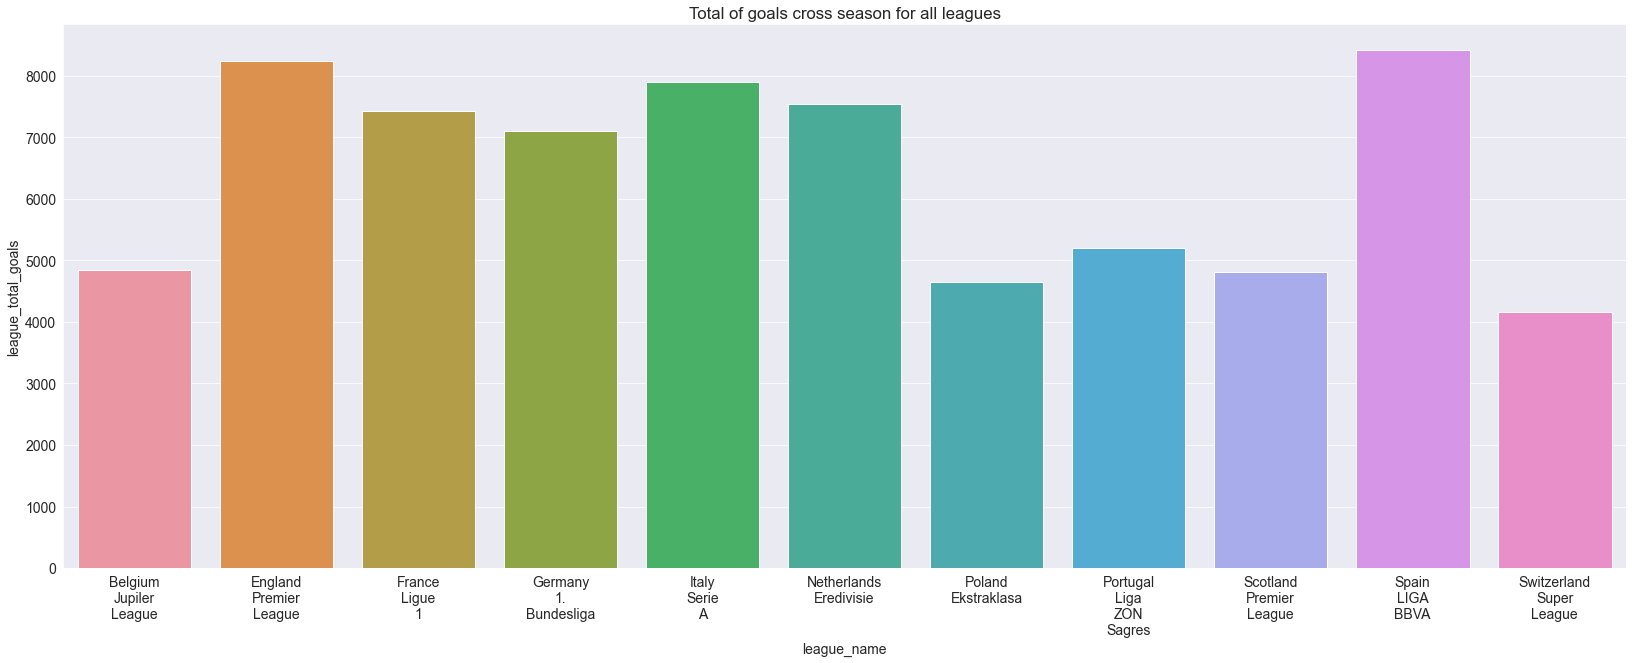

In [86]:
# Visualtion for the total of goals for every league
barplotting(match_final,'league_name','league_total_goals','Total of goals cross season for all leagues')

### * It is clear from the above that the 'Spain LIGA BBVA' has scored the most goals, and after it the English Premier League, now we'll try to determine the reasons for the sudden decrease in the number of goals starting from the thirtieth stage, and we will assume that there may be inequality between the leagues in relation to the number of league stages, and we'll begin to test this assumption:

In [87]:
# Getting the number of stages for every league
total_league_stage_goals= match_final.groupby(['league_name','stage'])[['home_team_goal','away_team_goal']].sum()
with pd.option_context('display.max_rows', 392):
    display(total_league_stage_goals)

home_team_goal  away_team_goal
league_name                 stage                                
Belgium\nJupiler\nLeague    1                 103              63
                            2                  87              64
                            3                  91              60
                            4                  98              84
                            5                  76              59
                            6                  97              70
                            7                  87              80
                            8                 108              83
                            9                 101              61
                            10                100              75
                            11                 87              63
                            12                 87              79
                            13                112              65
                            14                 83              72
                            15                100              59
                            16                 94              63
                            17                 83              69
                            18                 81              70
                            19                 87              74
                            20                104              61
                            21                 79              80
                            22                 87              78
                            23                 82              72
                            24                 87              63
                            25                 83              62
                            26                 78              58
                            27                101              48
                            28                 84              61
                            29                 90              57
                            30                 87              68
                            31                 18              10
                            32                 11               8
                            33                 14              10
                            34                 14              11
England\nPremier\nLeague    1                 108             102
                            2                 117              89
                            3                 112              98
                            4                 114              95
                            5                 142              95
                            6                 125              96
                            7                 139             105
                            8                 152             101
                            9                 111             102
                            10                118              85
                            11                140              87
                            12                126             100
                            13                126              89
                            14                117              95
                            15                122              91
                            16                110              98
                            17                120             104
                            18                115              77
                            19                116              85
                            20                120             109
                            21                120              89
                            22                127              90
                            23                125              86
                            24                107              82
                            25                121              89
         

### * It is clear from the above that the Polish League does not include more than thirty stages, in addition to the fact that some other leagues include less than thirty-eight stages, such as the Belgian, Swiss and German leagues, now we'll try using the arithmetic average instead of totals to test if that will lead to a difference in the results:

In [88]:
# Getting the mean of goals for every Stage.
mean_stage_goals= match_final.groupby('stage')[['home_team_goal','away_team_goal']].mean()
mean_stage_goals

,home_team_goal,away_team_goal
stage,,
1,1.433784,1.151351
2,1.539189,1.183784
3,1.463514,1.145946
4,1.593243,1.143243
5,1.441892,1.133784
6,1.527027,1.154054
7,1.582656,1.161247
8,1.700542,1.241192
9,1.451220,1.130081


In [89]:
mean_stage_goals['stage_mean_goals']=mean_stage_goals['home_team_goal']+mean_stage_goals['away_team_goal']
mean_stage_goals

,home_team_goal,away_team_goal,stage_mean_goals
stage,,,
1,1.433784,1.151351,2.585135
2,1.539189,1.183784,2.722973
3,1.463514,1.145946,2.609459
4,1.593243,1.143243,2.736486
5,1.441892,1.133784,2.575676
6,1.527027,1.154054,2.681081
7,1.582656,1.161247,2.743902
8,1.700542,1.241192,2.941734
9,1.451220,1.130081,2.581301


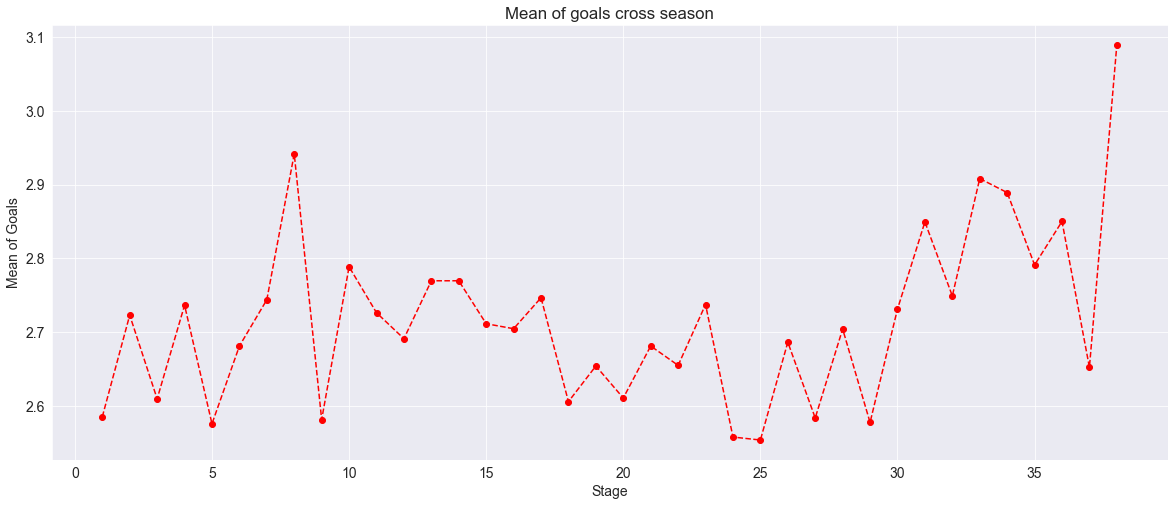

In [90]:
# Visualtion for the mean of goals for stages 
plotting(mean_stage_goals,'stage_mean_goals','Stage','Mean of Goals','Mean of goals cross season')

### * It is clear from the above there's a difference in the results, as the last stages witnessed the largest average of goals, which is due to the increasing desire of the small teams at that stages to stay in the league and the big teams to win the league, now we'll try to see if the ranking of leagues will also be different:

In [91]:
# Getting the mean of goals for every league and merging.
mean_league_goals= match_final.groupby('league_name')[['home_team_goal','away_team_goal']].mean()
mean_league_goals

,home_team_goal,away_team_goal
league_name,,
Belgium\nJupiler\nLeague,1.609375,1.192130
England\nPremier\nLeague,1.550987,1.159539
France\nLigue\n1,1.402961,1.040132
Germany\n1.\nBundesliga,1.626634,1.274918
Italy\nSerie\nA,1.500829,1.116009
Netherlands\nEredivisie,1.779820,1.301062
Poland\nEkstraklasa,1.394792,1.030208
Portugal\nLiga\nZON\nSagres,1.408382,1.126218
Scotland\nPremier\nLeague,1.429276,1.204496


In [92]:
mean_league_goals['league_mean_goals']=mean_league_goals['home_team_goal']+mean_league_goals['away_team_goal']
mean_league_goals

,home_team_goal,away_team_goal,league_mean_goals
league_name,,,
Belgium\nJupiler\nLeague,1.609375,1.192130,2.801505
England\nPremier\nLeague,1.550987,1.159539,2.710526
France\nLigue\n1,1.402961,1.040132,2.443092
Germany\n1.\nBundesliga,1.626634,1.274918,2.901552
Italy\nSerie\nA,1.500829,1.116009,2.616838
Netherlands\nEredivisie,1.779820,1.301062,3.080882
Poland\nEkstraklasa,1.394792,1.030208,2.425000
Portugal\nLiga\nZON\nSagres,1.408382,1.126218,2.534600
Scotland\nPremier\nLeague,1.429276,1.204496,2.633772


In [93]:
mean_league_goals.drop(['home_team_goal','away_team_goal'], axis=1, inplace=True)

In [94]:
match_final=match_final.merge(mean_league_goals, on='league_name')
match_final.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league_name,league_total_goals,league_mean_goals
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.50,1.78,3.25,4.00,1.73,3.40,4.20,Belgium\nJupiler\nLeague,4841,2.801505
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,1.85,3.25,3.75,1.91,3.25,3.60,Belgium\nJupiler\nLeague,4841,2.801505
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.65,2.50,3.20,2.50,2.30,3.20,2.75,Belgium\nJupiler\nLeague,4841,2.801505
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,6.50,1.50,3.75,5.50,1.44,3.75,6.50,Belgium\nJupiler\nLeague,4841,2.801505
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.65,4.50,3.50,1.65,4.75,3.30,1.67,Belgium\nJupiler\nLeague,4841,2.801505


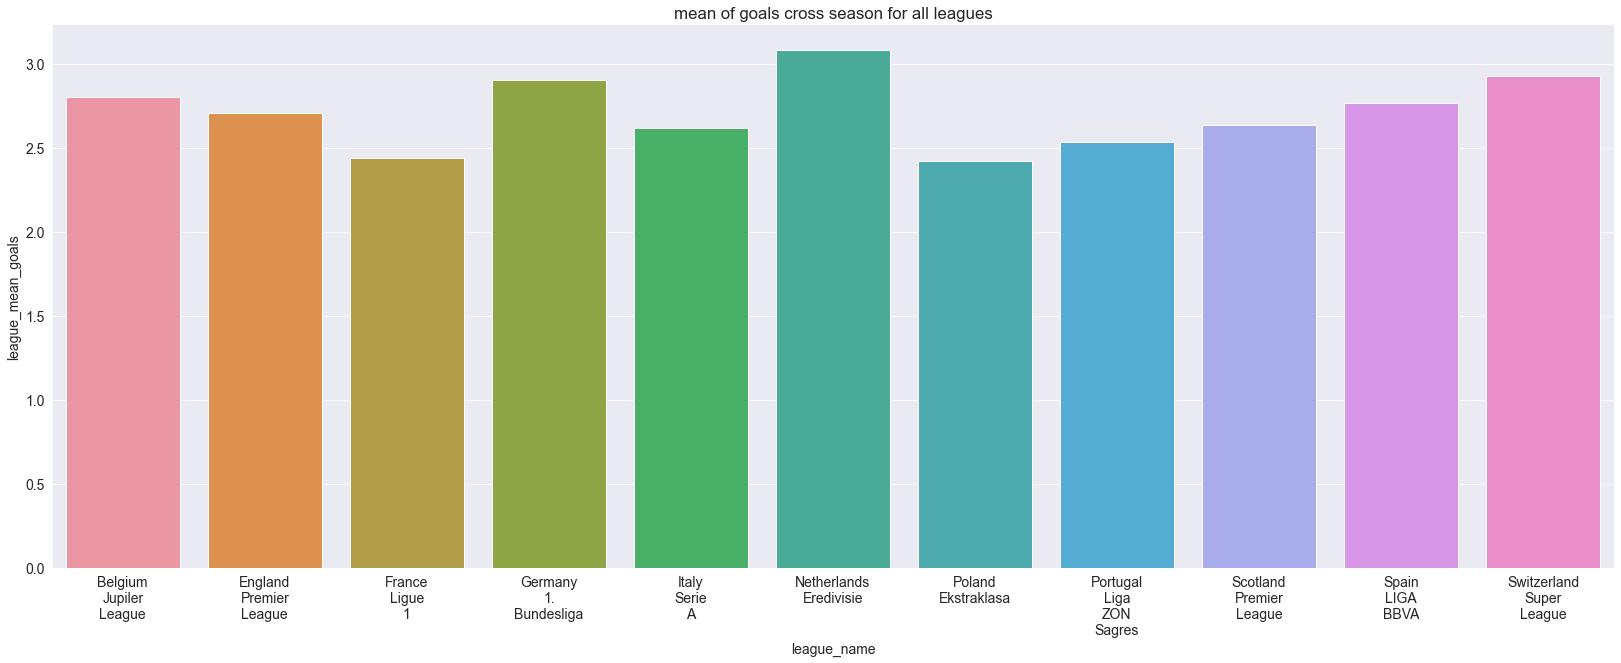

In [95]:
# Visualtion for the mean of goals for every league
barplotting(match_final,'league_name','league_mean_goals','mean of goals cross season for all leagues')

### * It is clear from the above there's also a difference in the results, as the using of the mean instead of sum has also led to change the order of the leagues regarding scoring goals, the 'Netherlands Eredivisie' became at the first place.

In [96]:
# Closing the database
conn.close()

<a id='conclusions'></a>
## Conclusions

Through the previous results, the following was found:

> **The First Result**: The ten most players for the mean of finishing attacks was orderely Listed using 'groupby' method started with Lionel Messi (first place) and ended with Wyne Rooney (tenth place), the ten most factors positively related to finishing was found using correlation coefficients started with volleys (first place) and ended with vision (tenth place). 

> **The Second Result**: Visualization was used to show the most league stages, and the most leagues in which goals scored, the most goals was scored at the eighth stage, and 'Spain LIGA BBVA' has scored the most goals, and after it the English Premier League.

> **Notes**: It is clear from the graph that the total goals began to decrease from the thirty stage, and this may be due to the fact that the Polish League does not include more than thirty stages, in addition to the fact that some other leagues include less than thirty-eight stages, such as the Belgian, Swiss and German leagues, which prompted me to try using the arithmetic average next to the total, which led to a difference in the results, as the last stage witnessed the largest average of goals, which is due to the increasing desire of the small teams at that stage to stay in the league and the big teams to win the league, In addition to that the using of the mean instead of sum has also led to a change the order of the leagues regarding scoring goals, which makes the mean more significant in my opinion.

> **Recommenadtions for future analysis**: Complete the research regarding other aspects such as defense, pressure, attack build-up speed, etc

## Submitting your Project 

In [97]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1